In [1]:
import pandas as pd


data = pd.read_csv("data/wdbc.data", sep=",", header=None)
# denote features and improve readability
features = ["radius", "texture", "perimeter", "area", "smoothness", "compactness", "concavity", "concave pts", 
            "symmetry", "frac dim"]
features3 = []
descr = ["mean", "stderr", "worst"]
for i in range(30):
    if i < 10: 
        features3.append(descr[0] + " "+ features[i%10])
    elif i < 20: 
        features3.append(descr[1] + " " + features[i%10])
    else: 
        features3.append(descr[2] + " " + features[i%10])
data.columns = ["ID", "Malignant/Benign"] + features3
print(data)

           ID Malignant/Benign  mean radius  mean texture  mean perimeter  \
0      842302                M        17.99         10.38          122.80   
1      842517                M        20.57         17.77          132.90   
2    84300903                M        19.69         21.25          130.00   
3    84348301                M        11.42         20.38           77.58   
4    84358402                M        20.29         14.34          135.10   
..        ...              ...          ...           ...             ...   
564    926424                M        21.56         22.39          142.00   
565    926682                M        20.13         28.25          131.20   
566    926954                M        16.60         28.08          108.30   
567    927241                M        20.60         29.33          140.10   
568     92751                B         7.76         24.54           47.92   

     mean area  mean smoothness  mean compactness  mean concavity  \
0     

In [59]:
import numpy as np

# define M as 1 and B as 0

def sigmoid(x):
    return 1.0/(1 + np.exp(-x))

def sig_deriv(x):
    return sigmoid(x) * (1 - sigmoid(x))

def get_inputs(data, features, train_size):
    x = data.loc[:,features]
    classif = data["Malignant/Benign"]
    y = []
    for index in classif:
        if index == "B":
            y.append(0)
        else:
            y.append(1)
    #x = np.asarray(x)
    #y = np.asarray(y)
    split = int(train_size * len(x))
    return x[:split], y[:split], x[split:], y[split:]

def verify(x_test, y_test, hidden_dim, pre_hidden_nodes, input_to_hidden_w, post_hidden_nodes, hidden_to_out_w, threshold):
    correct = 0
    for index in range(x_test.shape[0]):
        for node in range(hidden_dim):
            pre_hidden_nodes[node] = np.dot(x_test[index], input_to_hidden_w[:, node])
            post_hidden_nodes[node] = sigmoid(pre_hidden_nodes[node])
        pre_output = np.dot(post_hidden_nodes, hidden_to_out_w)
        output = sigmoid(pre_output)

        if output > threshold:
            output = 1
        else:
            output = 0
        if output == y_test[index]:
            correct += 1
    return correct/x_test.shape[0]

def train(n, rate, x_train, y_train, x_test, y_test): 
    N = len(x_train)    


    input_dim = x_train.shape[1]
    hidden_dim = 4
    epochs = n
    threshold = 0.5
    learning_rate = rate

    np.random.seed(159)
    input_to_hidden_w = np.random.uniform(-1, 1, (input_dim, hidden_dim))
    hidden_to_out_w = np.random.uniform(-1, 1, hidden_dim)
    pre_hidden_nodes = np.zeros(hidden_dim)
    post_hidden_nodes = np.zeros(hidden_dim)

    for epoch in range(epochs):
        for index in range(N):
            for node in range(hidden_dim):
                pre_hidden_nodes[node] = np.dot(x_train[index], input_to_hidden_w[:, node])
                post_hidden_nodes[node] = sigmoid(pre_hidden_nodes[node])
            pre_output = np.dot(post_hidden_nodes, hidden_to_out_w)
            output = sigmoid(pre_output)

            error = output - y_train[index]

            for h in range(hidden_dim):
                s = error * sig_deriv(pre_output)
                grad_h_o = s * post_hidden_nodes[h]
                for i in range(input_dim):
                    grad_i_h = x_train[index, i] * s * hidden_to_out_w[h] * sig_deriv(pre_hidden_nodes[h])
                    input_to_hidden_w[h] -= learning_rate * grad_i_h
                hidden_to_out_w[h] -= learning_rate * grad_h_o

    train_err = verify(x_train, y_train, hidden_dim, pre_hidden_nodes, input_to_hidden_w, post_hidden_nodes, hidden_to_out_w,
                       threshold)
    test_err = verify(x_test, y_test, hidden_dim, pre_hidden_nodes, input_to_hidden_w, post_hidden_nodes, hidden_to_out_w,
                      threshold)
    return [train_err, test_err]

In [23]:
x_train, y_train, x_test, y_test = get_inputs(data, ['mean radius', 'mean texture', 'mean smoothness', 'mean compactness',
           'mean concavity'], 0.8)
train_err, test_err = [], []
n_epochs = 500
l_rate = 0.01
for n in range(20, n_epochs, 20): 
    print("Total epochs: ", n)
    err = train(n, l_rate, x_train, y_train, x_test, y_test)
    train_err.append(err[0])
    test_err.append(err[1])
    print(err[0], err[1])
    

Total epochs:  20
0.6175824175824176 0.7807017543859649
Total epochs:  40
0.6461538461538462 0.7894736842105263
Total epochs:  60
0.6527472527472528 0.7982456140350878
Total epochs:  80
0.6527472527472528 0.7982456140350878
Total epochs:  100
0.654945054945055 0.8070175438596491
Total epochs:  120
0.6505494505494506 0.8070175438596491
Total epochs:  140
0.6373626373626373 0.7894736842105263
Total epochs:  160
0.5912087912087912 0.7719298245614035
Total epochs:  180
0.5912087912087912 0.7719298245614035
Total epochs:  200
0.5912087912087912 0.7719298245614035
Total epochs:  220
0.5912087912087912 0.7719298245614035
Total epochs:  240
0.5912087912087912 0.7719298245614035
Total epochs:  260
0.5912087912087912 0.7719298245614035
Total epochs:  280
0.5912087912087912 0.7719298245614035
Total epochs:  300
0.5912087912087912 0.7719298245614035
Total epochs:  320
0.5912087912087912 0.7719298245614035
Total epochs:  340
0.5912087912087912 0.7719298245614035
Total epochs:  360
0.591208791208791

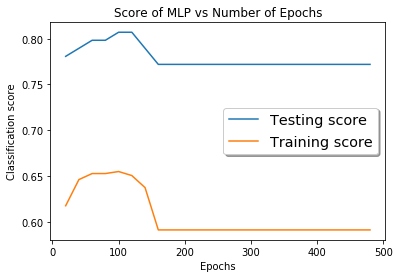

In [25]:
import matplotlib.pyplot as plt

epochs = np.arange(20, n_epochs, 20)
plt.figure()
plt.plot(epochs, test_err, label='Testing score')
plt.plot(epochs, train_err, label='Training score')
plt.xlabel('Epochs')
plt.ylabel('Classification score')
plt.title('Score of MLP vs Number of Epochs')
plt.legend(loc=0, shadow=True, fontsize='x-large')
plt.show()

In [11]:
print(epochs)

[ 50 100 150 200 250 300 350 400 450]


In [28]:
from sklearn.neural_network import MLPClassifier

x_train, y_train, x_test, y_test = get_inputs(data, ['mean radius', 'mean texture', 'mean smoothness', 'mean compactness',
       'mean concavity'], 0.8)
mlp = MLPClassifier(hidden_layer_sizes=(4,), max_iter=30, alpha=1e-4,
                    solver='sgd', random_state=1,
                    learning_rate_init=.1)

mlp.fit(x_train,y_train)
print(mlp.score(x_train, y_train))
print(mlp.score(x_test, y_test))

0.5912087912087912
0.7719298245614035


**Trying all 7 mean features** in an effort to improve the MLP

In [31]:
x_train1, y_train1, x_test1, y_test1 = get_inputs(data, ["mean radius", "mean texture", "mean perimeter", "mean area", 
                                                     "mean smoothness", "mean compactness", "mean concavity", 
                                                     "mean concave pts", "mean symmetry", "mean frac. dim"], 0.8)
train_err1, test_err1 = [], []
for n in range(50, n_epochs, 50): 
    print("Total epochs: ", n)
    err1 = train(n, l_rate, x_train1, y_train1, x_test1, y_test1)
    train_err1.append(err[0])
    test_err1.append(err[1])
    print(err1[0], err1[1])

Total epochs:  50
0.5868131868131868 0.7456140350877193
Total epochs:  100
0.5868131868131868 0.7456140350877193
Total epochs:  150
0.5868131868131868 0.7456140350877193
Total epochs:  200
0.5868131868131868 0.7456140350877193
Total epochs:  250
0.5868131868131868 0.7456140350877193
Total epochs:  300
0.5868131868131868 0.7456140350877193
Total epochs:  350
0.5868131868131868 0.7456140350877193
Total epochs:  400
0.5868131868131868 0.7456140350877193
Total epochs:  450
0.5868131868131868 0.7456140350877193


**Trying all 30 features** in an effort to improve the MLP

In [35]:
x_train2, y_train2, x_test2, y_test2 = get_inputs(data, data.columns[2:], 0.8)
train_err2, test_err2 = [], []
for n in range(10, 100, 10): 
    print("Total epochs: ", n)
    err2 = train(n, l_rate, x_train2, y_train2, x_test2, y_test2)
    train_err2.append(err[0])
    test_err2.append(err[1])
    print(err2[0], err2[1])

Total epochs:  10
0.5912087912087912 0.7719298245614035
Total epochs:  20
0.5912087912087912 0.7719298245614035
Total epochs:  30
0.5912087912087912 0.7719298245614035
Total epochs:  40


KeyboardInterrupt: 

In [95]:
mlp1 = MLPClassifier(hidden_layer_sizes=(4,), max_iter=100, alpha=1e-4,
                    solver='sgd', random_state=1,
                    learning_rate_init=.01)

mlp1.fit(x_train3, y_train3)
print(mlp1.score(x_train3, y_train3))
print(mlp1.score(x_test3, y_test3))

0.5912087912087912
0.7719298245614035


In [87]:
def get_inputs1(data, features, train_size):
    x = data.loc[:,features]
    classif = data["Malignant/Benign"]
    y = [ 1 if x == "M" else 0 for x in classif]
    split = int(train_size * len(x))
    return x.head(split).values, y[:split], x.tail(len(x)-split).values, y[split:]

**Referred to very original paper** in an attempt to improve the MLP

In [91]:
#Mean Radius, Mean Perimeter, Mean Fractal, Dimension, Worst Radius, and Worst Area. 
x_train3, y_train3, x_test3, y_test3 = get_inputs1(data, ["mean radius", "mean perimeter", "mean frac. dim",
                                                        "worst radius", "worst area"], 0.8)
train_err3, test_err3 = [], []
for n in range(0, 5): 
    print("Total epochs: ", n)
    err3 = train(n, l_rate, x_train3, y_train3, x_test3, y_test3)
    train_err3.append(err3[0])
    test_err3.append(err3[1])
    print(err3[0], err3[1])

Total epochs:  0
0.5912087912087912 0.7719298245614035
Total epochs:  1
0.5912087912087912 0.7719298245614035
Total epochs:  2
0.5912087912087912 0.7719298245614035
Total epochs:  3
0.5912087912087912 0.7719298245614035
Total epochs:  4
0.5912087912087912 0.7719298245614035


In [89]:
x_train3, y_train3, x_test3, y_test3 = get_inputs1(data, ["mean radius", "mean perimeter", "mean frac. dim",
                                                        "worst radius", "worst area"], 0.8)
print(x_train3, y_train3)
print(x_test3, y_test3)
print(len(x_train3), len(x_test3))
print(len(y_train3), len(y_test3))

[[1.799e+01 1.228e+02 7.871e-02 2.538e+01 2.019e+03]
 [2.057e+01 1.329e+02 5.667e-02 2.499e+01 1.956e+03]
 [1.969e+01 1.300e+02 5.999e-02 2.357e+01 1.709e+03]
 ...
 [1.200e+01 7.677e+01 6.104e-02 1.309e+01 5.237e+02]
 [1.453e+01 9.386e+01 6.121e-02 1.580e+01 7.499e+02]
 [1.262e+01 8.062e+01 5.826e-02 1.434e+01 6.335e+02]] [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 

In [52]:
feat = ["mean radius", "mean perimeter", "mean frac. dim", "worst radius", "worst area"]
data

,ID,Malignant/Benign,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave pts,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave pts,worst symmetry,worst frac. dim
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [120]:
def parse_data(): 
    d2 = np.asmatrix(data.values)
    x = d2[:, 2:]
    classif = data["Malignant/Benign"]
    y = np.asarray([ 1 if x == "M" else 0 for x in classif])
    return x, y
    

**K-fold cross validation** in an attempt to improve the MLP

In [128]:
from sklearn.model_selection import KFold
X, Y = parse_data()
for folds in range(2, 11): 
    traine, teste = 0, 0
    kf = KFold(n_splits=folds)
    for train_index, test_index in kf.split(X):
        #print("TRAIN:", train_index, "TEST:", test_index)
        #print(train_index, test_index)
        X_train, X_test = X[train_index], X[test_index]
        Y_train, Y_test = Y[train_index], Y[test_index]
        err3 = train(100, l_rate, X_train, Y_train, X_test, Y_test)
        traine += err3[0]
        teste += err3[1]
    print("Train: ", traine/folds)
    print("Test: ", teste/folds)

Train:  0.627656288608846
Test:  0.627656288608846
Train:  0.6274799796324585
Test:  0.6276710294254154
Train:  0.6274559927873251
Test:  0.6277701172067369
Train:  0.627432041642568
Test:  0.6276665114112715


KeyboardInterrupt: 

In [ ]:
mlp2 = MLPClassifier(hidden_layer_sizes=(4,), max_iter=100, alpha=1e-4,
                    solver='sgd', random_state=1,
                    learning_rate_init=.01)
    mlp2.fit(X_train, Y_train)
    print("Train: ", mlp2.score(X_train, Y_train))
    print("Test: ", mlp2.score(X_test, Y_test))